In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_squared_error , classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from sklearn.model_selection import train_test_split
import pickle
from scipy.stats import shapiro
import statsmodels.api as sm
import pylab
from scipy.stats import kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets-Github/iris.csv' ,)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
type(df.Species)


pandas.core.series.Series

In [ ]:


#Montando nossa palheta de cores 
k = ['#b8f2e6' , '#ffa69e' , '#ffe66d']


px.scatter(df, x = 'SepalLength' , y = 'SepalWidth' , color = 'Species' ,
           color_discrete_sequence= k
           , opacity = .9 , template = 'none' , 
           title = 'Scatter Plot Visualização de Largura e Comprimento das Sépalas de Cada Espécie', size = df.SepalLength)


In [ ]:

px.scatter(df, x = 'PetalLength' , y = 'PetalWidth' , color = 'Species' , color_discrete_sequence= k
           , opacity = .9  , template = 'none' , title = 'Scatter Plot Visualização de Largura e Comprimento das Pétalas de Cada Espécie', 
           size = df.SepalLength)


Observe que as classes (espécies) estão mais isoladas no hiperplano relacionado a largura e comprimento de pétalas se comparado com a mesma métrica para sépalas.
*Compare os 2 gráficos de dispersão*

Se as variáveis de largura e comprimento de pétala forem altamente correlacionada com a largura e comprimento de sépala, poderemos utilizar somente um dos parâmetros

Sépala ou Pétala (Nesse caso, o nosso maior potencial de classificação está vindo das Pétalas, pelo motivo comentado anteriormente)

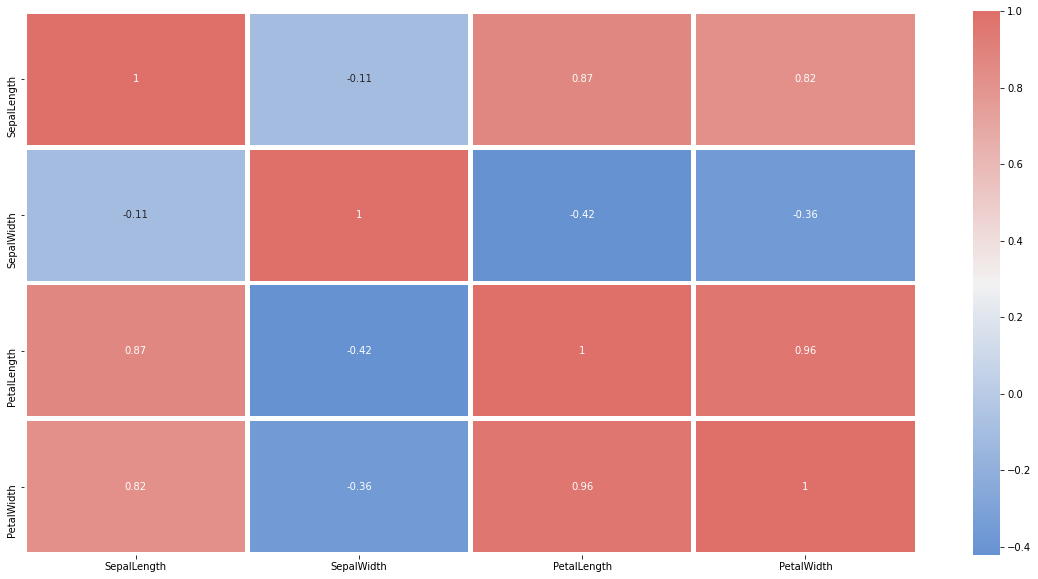

In [ ]:

corrPearson = df.corr()

plt.figure(figsize=(20,10))
cmap = sns.diverging_palette(250,15,s=60,l=60,n=9,center = 'light' , as_cmap= True)
sns.heatmap(corrPearson ,annot = True ,cmap = cmap , linewidth = 4 , )

# Como podemos ver pela demonstrado aqui por cores em tons avermelhados, as variáveis que conversamos anteriormente possuem alta correlação positiva(> 80 em algumas das métricas)
#Sepal Width parece um pouco isolada das outras, em termos de correlação
#Por isso, Sepal WIdth é uma importante variável para se manter no nosso modelo, provendo mais informações para o mesmo
# Testaremos modelos com parâmetros isolados e modelos com parâmetos juntos e veremos qual que sai melhor

In [ ]:
#Parâmetros isolados
Xp = df[['PetalLength' , 'PetalWidth']]
Xs = df[['SepalLength' , 'SepalWidth']]
#Parâmetos conjulgamente 
X = df.drop('Species' , axis = 1 )

#Isolando alvo (mesmo para todos os modelos para serem testado ... )

y = df.Species

Os parâmetros para os 3 modelos permanecerá como padrâo (baseline de comparação dentro das variáveis a serem utilizadas).

Como estamos olhando somente para a acurácia do modelo, faremos cross_validation.

Através de Cross_validation é possível treinar e testar o modelo com todo o dataset (alternando aleatóriamente dentre as porções dos dados para cada fold [10 no nosso ex]).

Fazendo isso, conseguimos evitar viés de posicionamento de dados e overfitting.
Poderiamos criar uma funçao para acelerar o processo e torná-lo menos manual, porém como são poucos parâmetros preferi fazer manualmente, mantendo o código limpo



In [ ]:

#Modelo Pétala 

Cp = cross_val_score(svm.SVC(), Xp, y , cv = 10 )

#Modelo Sépala

Cs = cross_val_score(svm.SVC() , Xs , y , cv = 10)

#Modelo Conjugal

Cc = cross_val_score(svm.SVC() , X , y , cv = 10)

print('Acurácia Média Obtida nos Modelos:\n\n Pétala: {} \n Sépala: {} \n Conjugal: {}'.format(Cp.mean(),Cs.mean(),Cc.mean()))

Acurácia Média Obtida nos Modelos:

 Pétala: 0.96 
 Sépala: 0.8266666666666668 
 Conjugal: 0.9733333333333334


Como derivamos anteriormente, a variável Pétala possui mais clareza na distribuição de classes e alta correlação com Sépala...
Por conta disso, obtemos grande acurácia, porêm o modelo conjugal obteve cerca de 1.3% a mais que o modlo somente utilizando pétalas como variável.

Se o nosso intuito fosse diminuir o tempo de processamento, escolher o 'Modelo Pétala' seria uma boa opção, pois diminuimos o input cerca de 50% e aceleramos 
o processo de convergência, com quase nenhuma perca em acurácia.

Porém, nesse notebook , continuaremos utilizar o Modelo Conjunto (pois obtem informação adicional) e o modelo que estamos utilizando é bem barato em termos de processamento. 

Text(0.5, 1.0, 'Proporção de Cada Espécie no DataSet')

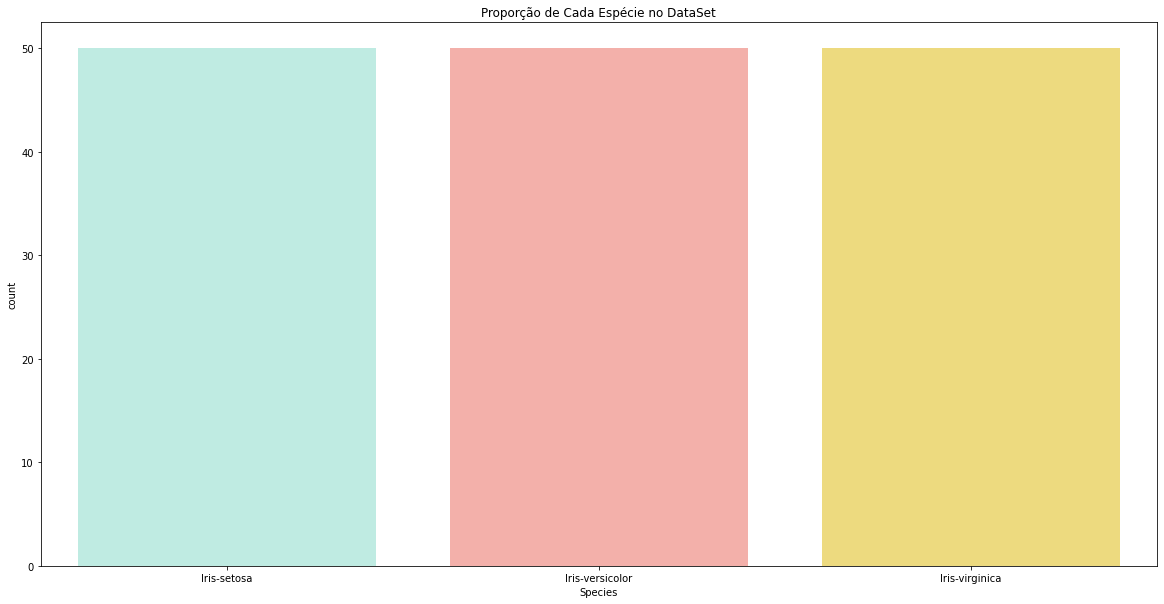

In [ ]:


plt.figure(figsize= (20,10))
sns.countplot(x = df.Species , palette = k ).set_title('Proporção de Cada Espécie no DataSet')



As espécies estão distribuidas igualmente no dataset, um bom sinal.
Se as espécies estivessem desbalanceadas, teriámos que tratar as varíaives através de técnicas como Oversampling,Undersampling e SMOTE.

Porém no nosso caso, isso não é nescessário, então continuaremos.

In [ ]:


fig = px.histogram(df,x=df.SepalLength , template = 'none' ,color_discrete_sequence= k , marginal= 'box' , color = 'Species',
                   title = 'Distribution of Sepal Length (cm)')
fig.update_layout(xaxis_title = 'Sepal Length (cm)',
               yaxis_title = ' ')

In [ ]:
fig = px.histogram(df,x=df.SepalWidth , template = 'none' ,color_discrete_sequence= k , marginal= 'box' , color = 'Species',
             )
fig.update_layout(xaxis_title = 'Sepal Width (cm)',
                  yaxis_title = ' ')

In [ ]:
fig = px.histogram(df,x=df.PetalLength , template = 'none' ,color_discrete_sequence= k , marginal= 'box' , color = 'Species',)
fig.update_layout(xaxis_title = 'Petal Length (cm)' , yaxis_title = ' ')

In [ ]:
fig = px.histogram(df,x = 'PetalWidth' , template = 'none' ,color_discrete_sequence= k , marginal= 'box' , color = 'Species' , )
fig.update_layout(xaxis_title = 'Petal WIdth (cm)' , 
                  yaxis_title = ' ')


In [ ]:
#Transformando as Categoria de espécie em valores númericos através da técnica LabelEncoder 

enc = LabelEncoder()
target = enc.fit_transform(df.Species)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Trocando Categoria Nominal por Categoria Númerica
 
df.drop('Species' , axis = 1 , inplace = True)
df['Species'] = target 
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Escalando nosso dado através de StandardScaler , deixaremos a média como 0 e o desvio padrão como 1, escalando nossos dados.

Em sistemas biológicos esperamos a categória estar distribuída normalmente entre as espécies (Central Limit Theorem), testaremos se cada variável está distribuída normalmente por teste de Shapiro-Wilk e visualizaremos a normalidade e variações através do QQPlot.

Um bom exemplo de distribuição Normal Gaussiano, seria altura e Peso em animais. Onde extremos são raros e pequenas variações entre a média são comumente encotradas.

In [ ]:
#Teste de Normalidade (Shapiro-Wilk)

print('Valor de SW para Sepal Length: {} '.format(shapiro(df['SepalLength'])))
print('Valor de SW para Sepal Width: {}'.format(shapiro(df['SepalWidth'])))
print('Valor de SW para Petal Length: {}'.format(shapiro(df['PetalLength'])))
print('Valor de SW para Petal Width:{}'.format(shapiro(df['PetalWidth'])))

#Todos os valores de p,com exceção de Sepal Width, são menores que 0.05 (Para aqueles com p < 0.005 aceitamos a hipótese Nula[variavéis Normalmente distribuídas ])
#Faremos Normalização através da técnica Standard Scaler, posteriormente, que potencialmente distribuirá todas as nossas variáveis normalmente
#Além disso, o teste irá diminuir a,variação (fazendo média como 0 e std = 1 , diminuindo o tempo de convergência do modelo)

Valor de SW para Sepal Length: (0.9760897755622864, 0.01017984002828598) 
Valor de SW para Sepal Width: (0.9837918877601624, 0.0751834362745285)
Valor de SW para Petal Length: (0.8764241933822632, 7.544982416618495e-10)
Valor de SW para Petal Width:(0.902624249458313, 1.864667886763982e-08)


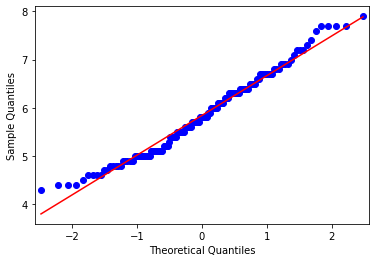

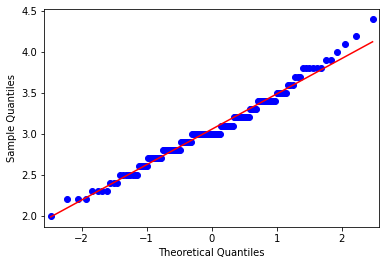

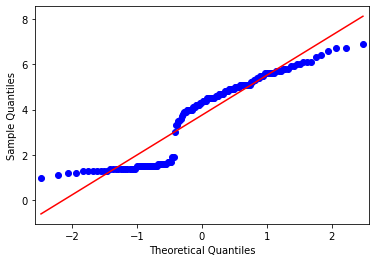

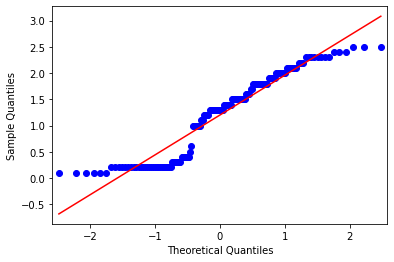

In [ ]:
#QQPlot mostrando normalidade e variações

sm.qqplot(df.SepalLength , line = 's' )
sm.qqplot(df.SepalWidth , line = 's')
sm.qqplot(df.PetalLength, line = 's')
sm.qqplot(df.PetalWidth , line = 's')
pylab.show()


In [ ]:
#Valores de Kurtosis e Skewness para cada coluna do dataset
variables = df.drop('Species', axis=1).columns
for i in variables:
  print('{}: Kurtosis {} , Skew {}'.format(df[i].name , kurtosis(df[i]) , skew(df[i]) ))

SepalLength: Kurtosis -0.5735679489249765 , Skew 0.3117530585022963
SepalWidth: Kurtosis 0.24144329938318343 , Skew 0.330702812773315
PetalLength: Kurtosis -1.3953593021397128 , Skew -0.2717119501716388
PetalWidth: Kurtosis -1.3352456441311857 , Skew -0.10394366626751729


In [ ]:
# Por isso, utilizaremos StandardScaler, escalando os dados 
# Isolaremos os dados à serem escalados em uma variável
# Posteriormente iremos criar um novo dataframe e trazeremos o target (coluna espécie) para o mesmo

zsc = StandardScaler()
data = df.drop('Species' , axis = 1 )
data = zsc.fit_transform(data)


In [ ]:
X = data 
y_ = df.Species

In [ ]:
cross_val_score(svm.SVC(),X,y,cv=10,scoring = 'accuracy')

array([1.        , 0.93333333, 1.        , 0.93333333, 1.        ,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [ ]:
xtr,xte,ytr,yte = train_test_split(X,y_ , test_size = .2 )

Ok, podemos melhorar o modelo, achando o melhor parâmetro através do GridSearch.

Kernel = Reflete em como o hiperplano é subdividido para a classificação 

C = sensibilidade de Fronteira , quanto maior o C menor é a permissão de erro (classificação errônea), porêm com alto c, problemas como overfitting emerge, pelo modelo ser extremamente complexo e adaptado aos dados disponíveis

Gamma = determinação de importância de dados ambíguos (perto da fronteira de separação de classes), quanto maior Gamma , maior relevância 


In [ ]:

pgrid = [{'kernel': ['linear' , 'rbf' , 'poly' ,],
          'C': [.001 , .01 ,1 , 10] , 
          'gamma': [0.1 , 1 , 10] }]

model = svm.SVC()
grid = GridSearchCV(model , pgrid , scoring = 'accuracy' , cv = 10)
grid.fit(X,y)


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 1, 10], 'gamma': [0.1, 1, 10],
                          'kernel': ['linear', 'rbf', 'poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#Isolandoo os melhores parâmetros

bestp = grid.best_params_
bestp

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
bmodel = svm.SVC(C = 1 , kernel = 'rbf' , gamma = .1 , )

In [ ]:
bmodel.fit(xtr,ytr)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y = bmodel.predict(X)
yhat = df.Species

In [ ]:
RMSE = np.sqrt(mean_squared_error(yhat , y ,))
print('RMSE do modelo:{}'.format(RMSE))

# O RMSE é uma medida de desvio ( o quanto nosso valor predito desvia do valor real do modelo, quanto mais próximo de 0 melhor)
# Quando valor do RMSE = 0 , significa que todos os valores preditos pelo modelo são idênticos aos reais (100 % de acurácia)
# Porêm somente o RMSE não é uma boa estimativa
#, pois é sensível ao overfitting (por isso tomamos todos os cuidados nescessários, através de cross_validation)

RMSE do modelo:0.2


In [ ]:
pd.crosstab(yhat , y , rownames = ['Real'] , colnames = ['Predito'])
#através da matriz é possível observar que o nosso modelo acertou toda a classe 0 , errou 1 da classe 1 e errou 5 da classe 2

Predito,0,1,2
Real,,,
0,50,0,0
1,0,49,1
2,0,5,45


In [ ]:
print(classification_report(yhat , y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



Okay, Esses foram os resultados obtidos através de SVM. Testaremos outro modelo , KNN , que também faz uso da proximidade em hiperplano, a proximidade entre pontos no hiperplano é característica inerente do dataset que estamos utilizando para a classificação da especie , como discutimos amplamente anteriormente.

In [ ]:
# A análise e visualização de dados ja foi feita, então pulamos direto para o tunning , validação e comparação dentre modelos.
# Aqui os dados normalizados (StandardScaler) também são importantes, pelos motivos discutidos acima.

kpgrid = [{'n_neighbors' : [1,3,5,7,] , 
           'weights': ['uniform', 'distance'], 
           'metric':['mihowski' , 'euclidean'], 
           }]

kmodel = KNeighborsClassifier()

kgrid = GridSearchCV(kmodel,kpgrid ,scoring = 'accuracy' , cv=10)

kgrid.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'metric': ['mihowski', 'euclidean'],
                          'n_neighbors': [1, 3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Significado dos Hiperparâmetros:

> N=neighbors = Número de vizinhos à serem considerados pelo modelo, cada indivíduo é classificado para uma classe onde a maioria dos seus vizinhos pertecem(por isso é importante usar este número ímpar). block



Weights 
> Uniform: Sem peso, todos os pontos equivalem em "importância". block

> Distance: A importância dos modelos decaem de acordo com a distância. (Importância inversamente correlacionada com o quadrado da distância entre pontos)

Metrics

> Mihowski: Distância calculada através de parábolas


> Euclidean: Uma simples linha reta como medida de métrica










In [ ]:
#Pegando melhores parâmetros

kgrid.best_estimator_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
kgrid.best_score_

0.9933333333333334

Agora vamos obter mais informações sobre o nosso modelo. Como acurácia,precisão,recall e f1-score (média harmônica entre precisão e acurácia)

In [ ]:
bkmodel = KNeighborsClassifier(n_neighbors=7 , weights = 'distance' , leaf_size = 30 , metric = 'euclidean' , 
                               metric_params = None , algorithm = 'auto')

In [ ]:
bkmodel.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [ ]:
kyp = bkmodel.predict(X)
kyhat = y
pd.crosstab(kyhat , kyp , rownames = ['Real'] , colnames= ['Predito'], margins = True)

Predito,0,1,2,All
Real,,,,
0,50,0,0,50
1,0,52,2,54
2,0,0,46,46
All,50,52,48,150


In [ ]:
krmse = np.sqrt(mean_squared_error(kyhat, kyp))
krmse
#RMSE é uma médida de desvio do nosso modelo (nosso modelo varia em média +-.11 do valor real)
#Note, que nós obtemos um RMSE menor com o modelo KNN se comparado com o anterior, SVN (0.11 x 0.2, respectivamente)

0.11547005383792516

In [ ]:
# Sabemos que KNN se saiu melhor se comparado ao modelo anterior através da métrica de desvio
# Vamos comparar os valores de acurácia, recall e precisão

print(classification_report(kyhat , kyp ,))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        54
           2       0.96      1.00      0.98        46

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



Como podemos ver, o modelo de KNN se saiu muito bem. Saiu melhor que o modelo anterior, SVM. Por isso, salvaremos o modelo KNN para o disco.

In [ ]:
pickle.dump(bkmodel , open('KNNIris.sav' , 'wb'))

In [ ]:
pickle.load(open('KNNIris.sav','rb'))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

Utilizaremos a técnica PCA para os modelos feitos anteriormente para observar se há ganho em perfomance

In [ ]:
#Testaremos melhorar o modelo através da técnica PCA, onde mediremos a variação para cada dimensão do nosso dataset, obtiremos porcentagem [0-1] para cada classe
pca = PCA()
knnModel = KNeighborsClassifier()

pipeline = Pipeline(steps = [('pca' , pca) , ('clf' , knnModel)])
parameters = {'pca__n_components': [1,2,3,4,5,6,7,8,9,10,11,12,13], 
              'clf__n_neighbors':[1,3,5,7,9,11,13,15],
              'clf__weights' : ['distance' , 'uniform'],
              'clf__metric':['mihowski','euclidean']}

PCAgrid = GridSearchCV(pipeline, parameters,cv = 10 , scoring = 'accuracy')

In [ ]:
dfii = pd.read_csv('/content/drive/MyDrive/Datasets-Github/iris.csv' ,)
X = dfii.drop('Species' , axis = 1 ,)
y = dfii.Species

In [ ]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
variables = X.columns
normalizer = MinMaxScaler()

for i in variables:
  array = np.array(X[i]).reshape(-1,1)
  z = normalizer.fit_transform(array)
  X.drop(i , axis = 1 , inplace = True)
  X[i] = z 

#Normalized Data
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [ ]:
PCAgrid.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                 

In [ ]:
PCAgrid.best_score_ #não obtivemos melhora com o PCA

0.9666666666666666

In [ ]:
PCAgrid.best_params_

{'clf__metric': 'euclidean',
 'clf__n_neighbors': 9,
 'clf__weights': 'uniform',
 'pca__n_components': 1}

In [ ]:
xPCA = PCA(n_components=1,).fit_transform(X)
knn = KNeighborsClassifier(metric='euclidean',n_neighbors=9,)

knn.fit(xPCA,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
cross_val_score(knn,xPCA,y,scoring = 'accuracy', cv=10)

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [ ]:
yhat = y
ypredict = knn.predict(xPCA)

pd.crosstab(yhat,ypredict,rownames=['Real'],colnames = ['Predito'])

Predito,Iris-setosa,Iris-versicolor,Iris-virginica
Real,,,
Iris-setosa,50,0,0
Iris-versicolor,0,48,2
Iris-virginica,0,4,46


In [ ]:
print(classification_report(yhat,ypredict)) # Não há diferenças significativas com o modelo anterior

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.92      0.96      0.94        50
 Iris-virginica       0.96      0.92      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



In [ ]:
#Testando PCA para modelo SVM
# Normalizando dados 

dfiii = pd.read_csv('/content/drive/MyDrive/Datasets-Github/iris.csv' ,)
X = dfiii.drop('Species' , axis = 1 ,)
y = dfiii.Species

variables = X.columns
normalizer = MinMaxScaler()

for i in variables:
  array = np.array(X[i]).reshape(-1,1)
  z = normalizer.fit_transform(array)
  X.drop(i , axis = 1 , inplace = True)
  X[i] = z 

#Normalized Data
X


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [ ]:
#Testaremos melhorar o modelo através da técnica PCA, onde mediremos a variação para cada dimensão do nosso dataset, obtiremos porcentagem [0-1] para cada classe
pca = PCA()
svmModel =svm.SVC()

pipeline = Pipeline(steps = [('pca' , pca) , ('clf' , svmModel)])
parameters = {'pca__n_components': [1,2,3,4,5,6,7,8,9,10,11,12,13],'clf__kernel': ['linear' , 'rbf' , 'poly' ,],
          'clf__C': [.001 , .01 ,1 , 10] , 
          'clf__gamma': [0.1 , 1 , 10] }
              
PCAgridSVM = GridSearchCV(pipeline, parameters,cv = 10 , scoring = 'accuracy')

In [ ]:
PCAgridSVM.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            pr...se,
                 

In [ ]:
PCAgridSVM.best_score_ #Não houve melhoras se comparado com o Modelo SVM anterior, manteremos o modelo anterior como o escolhido

0.9800000000000001